In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Lab 2023/Lab 5

This is an example of using RNN and LSTM to predict the next value in a time series.

In [1]:
# Import pandas and give it an alias pd
import pandas as pd

In [2]:
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

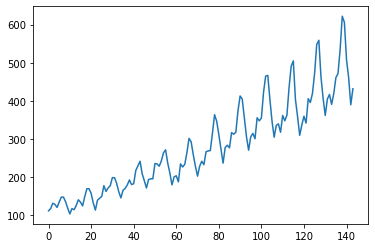

In [3]:
# plot dataset and required packages
import matplotlib.pyplot as plt

plt.plot(dataset)
plt.show()

In [4]:
# normalize the dataset and import required packages
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# split the dataset into train and test sets ( maintaining the temporal order of the data)
train_ratio = 0.67
train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
'''
Task: After you run this notebook successfuly, change train_ratio to be 0.80, and run the notebook again, record the evaluation metrics and then compare the results
'''

'\nTask: After you run this notebook successfuly, change train_ratio to be 0.80, and run the notebook again, record the evaluation metrics and then compare the results\n'

In [6]:
# print the sizes of train and test sets
print(len(train), len(test))

96 48


In [7]:
# The create_dataset function is used to transform a given dataset into a format that's suitable for time series forecasting.
# The look_back parameter specifies how many previous steps to use as input features for the prediction at the next time step.
# For example, when we have a dataset = [[1], [2], [3], [4], [5], [6]] and look_back is 1,
# dataX will be [[1], [2], [3], [4], [5]]
# dataY will be [2, 3, 4, 5, 6]
# So the model will be trained to predict 2 given [1], 3 given [2], 4 given [3], 5 given [4], and 6 given [5].

# import the required package
import numpy as np

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        b = dataset[i + look_back, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
for i in range (len(trainX)):
    print(trainX[i], trainY[i])

[0.01544401] 0.027027026
[0.02702703] 0.05405405
[0.05405405] 0.04826255
[0.04826255] 0.032818526
[0.03281853] 0.059845567
[0.05984557] 0.08494207
[0.08494207] 0.08494207
[0.08494207] 0.06177607
[0.06177607] 0.02895753
[0.02895753] 0.0
[0.] 0.027027026
[0.02702703] 0.021235526
[0.02123553] 0.042471036
[0.04247104] 0.07142857
[0.07142857] 0.059845567
[0.05984557] 0.040540546
[0.04054055] 0.08687258
[0.08687258] 0.12741312
[0.12741312] 0.12741312
[0.12741312] 0.10424709
[0.10424709] 0.055984557
[0.05598456] 0.01930502
[0.01930502] 0.06949806
[0.06949806] 0.07915059
[0.07915059] 0.08880308
[0.08880308] 0.14285713
[0.14285713] 0.11389962
[0.11389962] 0.13127413
[0.13127413] 0.14285713
[0.14285713] 0.18339768
[0.18339768] 0.18339768
[0.18339768] 0.15444016
[0.15444016] 0.11196911
[0.11196911] 0.08108109
[0.08108109] 0.1196911
[0.1196911] 0.12934363
[0.12934363] 0.14671814
[0.14671814] 0.17181468
[0.17181468] 0.14864865
[0.14864865] 0.15250966
[0.15250966] 0.22007722
[0.22007722] 0.24324325


In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Input a model code, `model_code = 1` for RNN and `model_code = 2` for LSTM.

In [11]:
 model_code = int(input("Input a model code, model_code = 1 for RNN and model_code = 2 for LSTM. Your choice: "))

Input a model code, model_code = 1 for RNN and model_code = 2 for LSTM. Your choice: 2


In [12]:
# Set up parameters for running the model
epochNo = 100
batchSize = 1

In [ ]:
# create and fit the RNN or LSTM network
# import required packages
import tensorflow as tf
from tensorflow.keras.layers import Dense

if (model_code == 1):
    '''
    Task: import SimpleRNN from tensorflow.keras.layers for using RNN model
    '''
    "Add your code here"


    model = tf.keras.Sequential()
    '''
    Task: Add a SimpleRNN layer using method add() with parameters: (4,input_shape=(1, look_back)) for the SimpleRNN layer
    '''
    "Add your code here"
    

    model.add(Dense(1))
    '''
    Task: Compile the model using method compile() from the model with parameters: loss='mean_squared_error', optimizer='adam'
    '''
    "Add your code here"


    '''
    Task: Train the model using method fit() from the model with the tran dataset, epochs=epochNo, batch_size=batchSize, verbose=2
    '''
    "Add your code here"

elif (model_code == 2):
    '''
    Task: import LSTM from tensorflow.keras.layers for using LSTM model
    '''
    "Add your code here"

    model =tf.keras.Sequential()
    '''
    Task: Add a LSTM layer using method add() with parameters: (4, input_shape=(1, look_back)) for the LSTM layer
    '''
    "Add your code here"

    model.add(Dense(1))
    
    '''
    Task: Compile the model using method compile() from the model with parameters: loss='mean_squared_error', optimizer='adam'
    '''
    "Add your code here"
  
    '''
    Task: Train the model using method fit() from the model with the tran dataset, epochs=epochNo, batch_size=batchSize, verbose=2
    '''
    "Add your code here"

else:
    print("invalid model code, try a correct code, 1 or 2")

In [14]:
# make predictions of train set
trainPredict = model.predict(trainX)

3/3 [==============================] - 1s 4ms/step


In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

In [16]:
# make predictions of test set
testPredict = model.predict(testX)

2/2 [==============================] - 0s 0s/step


In [17]:
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [18]:
# calculate root mean squared error and import required package
from sklearn.metrics import mean_squared_error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.63 RMSE
Test Score: 50.43 RMSE


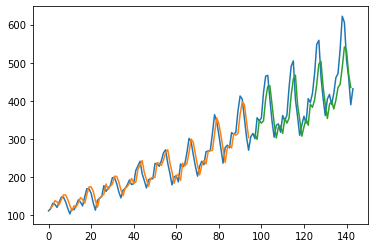

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()